# Dataset, DataLoader 

> 미니배치

In [32]:
import torch
from fastai.vision.all import *

### Dataset

In [2]:
X= torch.tensor([3.0,4.0,5.0,6.0,7.0,8.0,9.0])
y= torch.tensor([1.0,0.0,1.0,0.0,1.0,1.0,0.0])

In [3]:
X,y

(tensor([3., 4., 5., 6., 7., 8., 9.]), tensor([1., 0., 1., 0., 1., 1., 0.]))

In [5]:
ds= torch.utils.data.TensorDataset(X,y)

In [10]:
ds ## 그냥 텐서들의 pair이다.

In [11]:
ds.tensors

(tensor([3., 4., 5., 6., 7., 8., 9.]), tensor([1., 0., 1., 0., 1., 1., 0.]))

### DataLoader

`-` 배치사이즈=2, 셔플=True

In [12]:
dl= torch.utils.data.DataLoader(ds,batch_size=2, shuffle=True)

In [15]:
dl

In [16]:
dir(dl)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

- dl은 배치를 만드는 기능이 있음

### X,y 가 묶여 ds가 되고 DataLoader 함수로 ds 2개씩 묶여 dl이 되었다 

In [24]:
for xx,yy in dl:
    print(xx,yy)

tensor([8., 3.]) tensor([1., 1.])
tensor([4., 6.]) tensor([0., 0.])
tensor([5., 7.]) tensor([1., 1.])
tensor([9.]) tensor([0.])


### 그냥 경사하강법은 full data를 이용해 가중치 갱신
### 확률적 경사하강법은 full data 말고 임의의 데이터 뽑아서 가중치 갱신 

`-` 배치사이즈=2, 셔플=False

In [25]:
dl = torch.utils.data.DataLoader(ds, batch_size=2, shuffle=False)

In [29]:
for xx,yy in dl:
    print(xx,yy)

tensor([3., 4.]) tensor([1., 0.])
tensor([5., 6.]) tensor([1., 0.])
tensor([7., 8.]) tensor([1., 1.])
tensor([9.]) tensor([0.])


`-` 배치사이즈=3, 셔플=True

In [30]:
dl = torch.utils.data.DataLoader(ds, batch_size=3, shuffle=True)

In [31]:
for xx,yy in dl:
    print(xx,yy)

tensor([7., 4., 3.]) tensor([1., 0., 1.])
tensor([8., 6., 5.]) tensor([1., 0., 1.])
tensor([9.]) tensor([0.])


### MNIST 3/7 예제

`-` 우선 텐서로 이루어진 X,y를 만들자. 

In [33]:
path = untar_data(URLs.MNIST_SAMPLE)

In [34]:
threes = (path/'train'/'3').ls()
sevens = (path/'train'/'7').ls()

In [35]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

In [64]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,-1)
y= torch.tensor([0.0]*6265+[1.0]*6131).reshape(12396,1)

`-` dataset(X,y) 만들자

In [65]:
ds= torch.utils.data.TensorDataset(X,y)

In [66]:
ds.tensors

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0.],
         [0.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]]))

`-` DataLoader 만들기

In [67]:
dl= torch.utils.data.DataLoader(ds,batch_size=2048, shuffle=True)

`-` 네트워크(아키텍처), 손실함수, 옵티마이저, 

In [68]:
torch.manual_seed=(1)
net= torch.nn.Sequential(
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1,),
    #torch.nn.Sigmoid()
)
loss_fn= torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters())

`-` 저번시간 복습

In [69]:
for epoc in range(200):
    
    ##1
    yhat=net(X)
    
    ##2
    loss= loss_fn(yhat,y)
    
    ##3
    loss.backward()
    
    ##4
    optimizer.step()
    net.zero_grad()

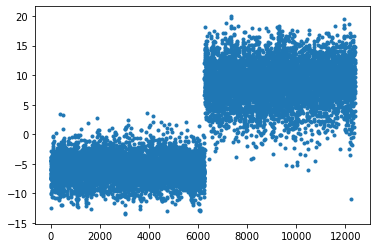

In [71]:
plt.plot(yhat.data,'.')

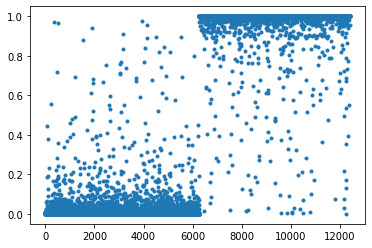

In [72]:
f= torch.nn.Sigmoid()
plt.plot(f(yhat.data),'.')

# 미니배치 활용해서 해보자!

In [73]:
torch.manual_seed=(1)
net= torch.nn.Sequential(
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1,),
    #torch.nn.Sigmoid()
)
loss_fn= torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters())

- 네트워크 파라메터 다시 초기화

In [75]:
12396/2048

6.052734375

- 총 7개의 batch가 만들어진다. $\to$ 따라서 파라미터를 업데이트하는 횟수가 7 * epoc 임 
- 실제적으로는 6* epch 될것임 

In [76]:
for epoc in range(33):
    for xx,yy in dl:
        ##1
        yyhat=net(xx)
        ##2
        loss= loss_fn(yyhat,yy)
        ##3
        loss.backward()
        ##4
        optimizer.step()
        net.zero_grad()

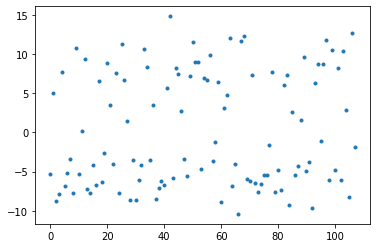

In [77]:
plt.plot(yyhat.data,'.')

- 이게 왜이러지?
- 배치사이즈를 다시 확인해보자.

In [78]:
for xx,yy in dl:
    print(xx.shape,yy.shape)


torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([2048, 784]) torch.Size([2048, 1])
torch.Size([108, 784]) torch.Size([108, 1])


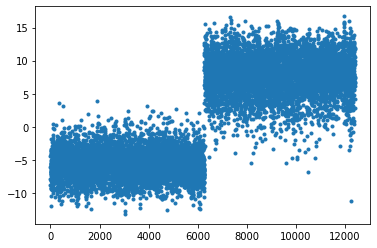

In [81]:
plt.plot(net(X).data,'.')

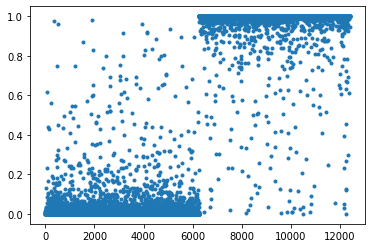

In [82]:
plt.plot(f(net(X).data),'.')

# 결론: 2048개 정도만 대충 학습해도 동일 반복횟수에 대하여 거의 대등한 효율이 나옴!

`-` GPU에 있는 메모리로 12396개의 데이터를 모두 보내지 않아도 괜찮겠다

`-` net.parameters()에 저장된 값들은 그대로 GPU로 가야만 한다. $\to$ 그래픽카드의 메모리를 얼마나 큰걸로 살지는 모형의 복잡도와 관련이 있다.

`-` 딥러닝용 컴퓨터 구매방법 
- 메모리: $n$이 큰 자료를 다룰수록 메모리가 커야한다.
- GPU의 메모리: 모형의 복잡도가 커질수록 (모델 파라미터수가 많을수록) 큰걸 사야한다.

# 숙제: 배치사이즈 1024개로 바꿔서 실행

In [83]:
dl= torch.utils.data.DataLoader(ds,batch_size=1024, shuffle=True)

`-` 네트워크(아키텍처), 손실함수, 옵티마이저, 

In [84]:
torch.manual_seed=(1)
net= torch.nn.Sequential(
    torch.nn.Linear(in_features=784, out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1,),
    #torch.nn.Sigmoid()
)
loss_fn= torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters())

In [93]:
12396/1024

12.10546875

In [94]:
200/12

16.666666666666668

In [95]:
for epoc in range(16):
    for xx,yy in dl:
        ##1
        yyhat=net(xx)
        ##2
        loss= loss_fn(yyhat,yy)
        ##3
        loss.backward()
        ##4
        optimizer.step()
        net.zero_grad()

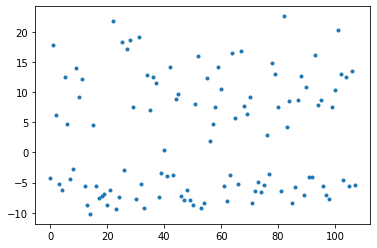

In [96]:
plt.plot(yyhat.data,'.')

- 이게 왜이러지?
- 배치사이즈를 다시 확인해보자.

In [97]:
for xx,yy in dl:
    print(xx.shape,yy.shape)

torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([1024, 784]) torch.Size([1024, 1])
torch.Size([108, 784]) torch.Size([108, 1])


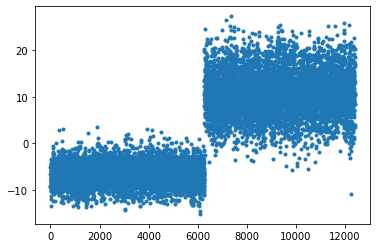

In [98]:
plt.plot(net(X).data,'.')

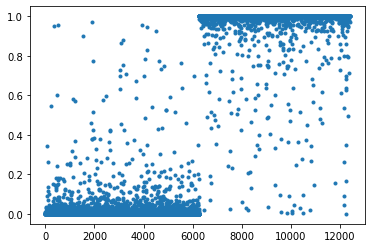

In [99]:
plt.plot(f(net(X).data),'.')